# Seaborn

## Distribution plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# tips is out of the box dataset
tips = sns.load_dataset("tips")

In [4]:
# head returns top 5 records in the dataset
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


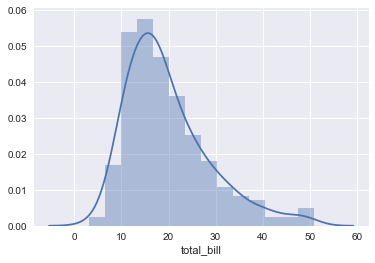

In [6]:
# distribution plot to analyze total bill
# these plots only take univariate data

#line represents KDE (kernel density estimation)
sns.distplot(tips['total_bill'])

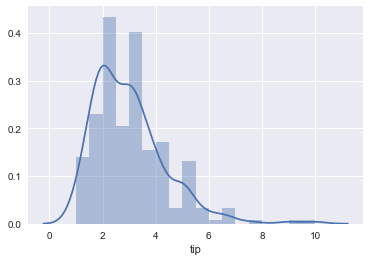

In [12]:
sns.distplot(tips['tip'])

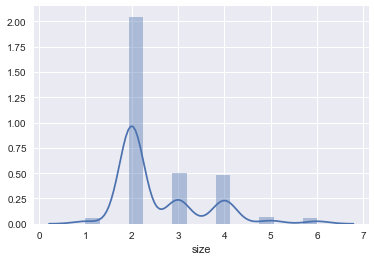

In [10]:
sns.distplot(tips['size'])

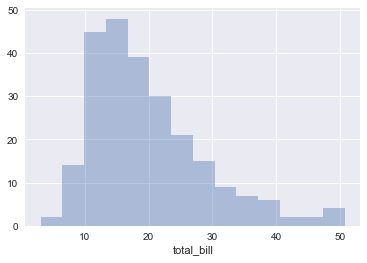

In [13]:
# we can disable the KDE line form the plot
sns.distplot(tips['total_bill'],kde=False)

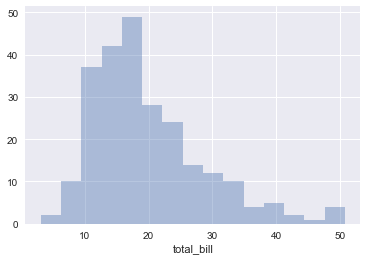

In [17]:
# by changing number of bins, you can try to analyze data 
# in order to find new insights
sns.distplot(tips['total_bill'],kde=False,bins=15)

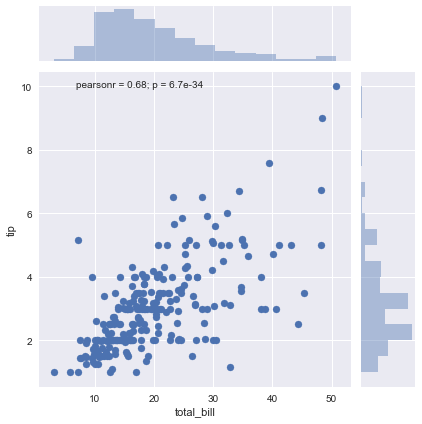

In [18]:
# let's try to plot a joint plot to understand 
# relation between total bill and tip
sns.jointplot(x='total_bill',y='tip',data=tips)

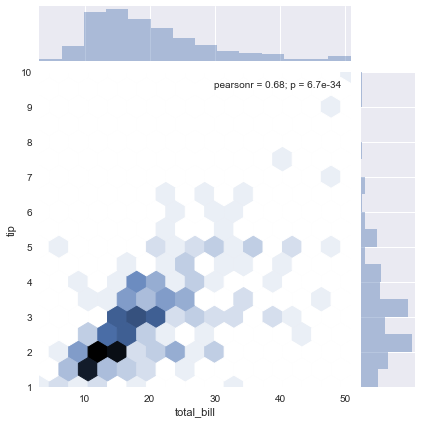

In [19]:
# different visualization
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

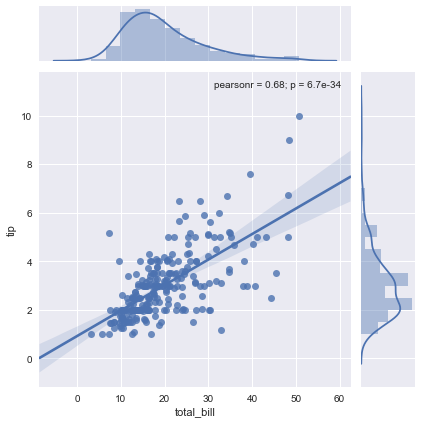

In [21]:
# linear regression plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

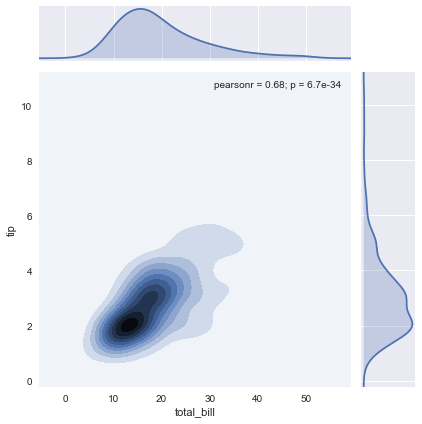

In [22]:
# KDE plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

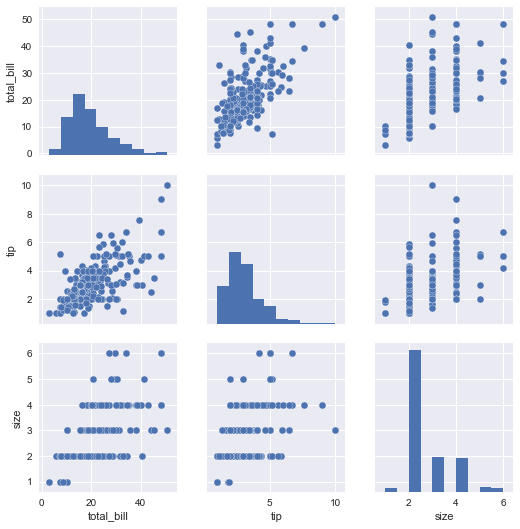

In [24]:
# let's plot the pairwise relation between entire dataset
# prepares the jointplots between the numerical columns
sns.pairplot(tips)

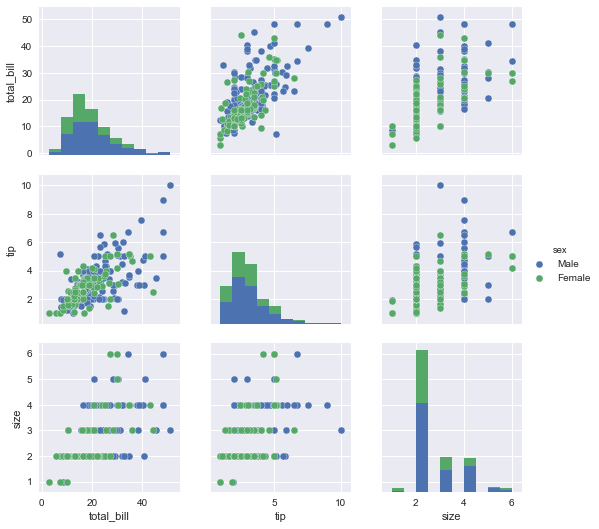

In [25]:
# we can also visualize the categorical data points in pair plots
sns.pairplot(tips,hue='sex')

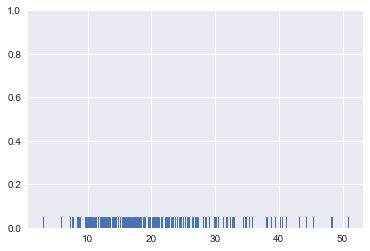

In [27]:
# let's build rugplots to study more about KDE
# it shows the histogram in a flat dash format
sns.rugplot(tips['total_bill'])

(0, 1)

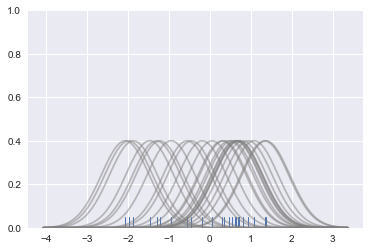

In [28]:
# These KDE plots replace every single observation with a 
# Gaussian (Normal) distribution centered around that value
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

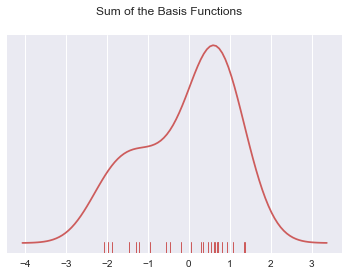

In [29]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])
# Set title
plt.suptitle("Sum of the Basis Functions")